In [1]:
%load_ext autoreload
%autoreload 2
import sounddevice as sd
import measuretf as mtf
from response import Response
import matplotlib.pyplot as plt
import numpy as np

# continuous excitation
with np.load("data/some_noise_only_pri.npz") as data:
    rec = data["rec"]
    fsc = data["fs"]

f1, H1, var_H = mtf.estimate_transfer_function_and_variance(
    rec[:, -1], rec[:, 0], fs=fsc, reg_lim_dB=30, nperseg=2048
)

f2, H2 = mtf.transfer_function_csd(rec[:, -1], rec[:, 0], fsc, nperseg=2048)

# sweep excitation
fs_resampled = 48000
n_pri = 6
postprocess = dict(
    fwindow=None,
    twindow=None,
    reg_lim_dB=30,  # TODO: tune
    fs_resample=fs_resampled,
    tcut=2048 / 48000,
    ref=-1,  # TODO: Use reference / sniffer here?
    calibration_gain=None,  # mic_calibration + [1, 1]    # TODO: mic_calibration
)

fss, ir = mtf.tf_and_post_from_saved_rec(
    "data/test_compare_to_continous_fs48000_2_rec.npz", plot=False, **postprocess
)
ref_ch = -1
ir = np.delete(ir, ref_ch, axis=1)
ir = ir[:n_pri, 0].sum(axis=0).mean(axis=0)


fig = Response.from_freq(fsc, H1).plot(label="estimate_transfer_function_and_variance")
Response.from_freq(fsc, H2).plot(use_fig=fig, label="transfer_function_csd")
Response.from_time(fss, ir).plot(
    use_fig=fig, label="sweep", dblim=(-30, -15), flim=(70, 20000), tlim=(0.022, 0.03)
);

Test min_x_rms of estimate_trasnfer_function_and_variance

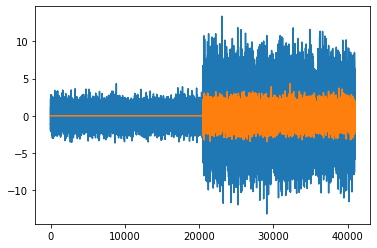

In [10]:
plt.plot(yn)
plt.plot(x)

(127, 33)
(64, 33)


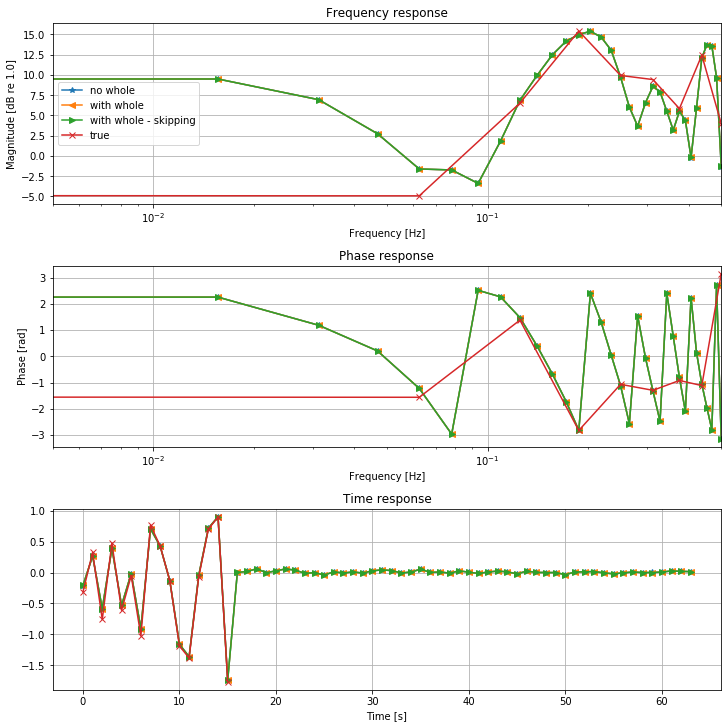

In [11]:
N = 2048
nperseg = 64
fs = 1
h = np.random.normal(size=16)
x = np.random.normal(size=2 * N)
n = np.random.normal(size=2 * N)
x[:N] = 0
yn = np.convolve(h, x, mode="full")[: 2 * N] + n

f1, H1, var_H1 = mtf.estimate_transfer_function_and_variance(x[N:], yn[N:], fs=fs, nperseg=nperseg)
f1, H2, var_H2 = mtf.estimate_transfer_function_and_variance(x, yn, fs=fs, nperseg=nperseg)
f1, H3, var_H3 = mtf.estimate_transfer_function_and_variance(
    x, yn, fs=fs, nperseg=nperseg, min_x_rms=1e-5
)

fig = Response.from_freq(fs, H1).plot(label="no whole", plot_kw=dict(marker="*"))
Response.from_freq(fs, H2).plot(use_fig=fig, label="with whole", plot_kw=dict(marker="<"))
Response.from_freq(fs, H3).plot(
    use_fig=fig, label="with whole - skipping", plot_kw=dict(marker=">")
)
Response.from_time(fs, h).plot(use_fig=fig, label="true", plot_kw=dict(marker="x"));

In [66]:
import librosa

x, sr = librosa.load("./MeiMea.mp3", sr=None)
h = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 3, 3, 3]

/home/fhchl/miniconda3/envs/sfc2/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [67]:
N = sr * 10
y = np.convolve(h, x, mode="full")[:N]
x = x[:N]
n = np.random.normal(size=N, scale=0.1)
yn = y + n

In [68]:
nperseg = 2 ** 14
f1, H1, var_H1 = mtf.estimate_transfer_function_and_variance(x, yn, fs=sr, nperseg=nperseg)
f1, H2, var_H2 = mtf.estimate_transfer_function_and_variance(
    x, yn, fs=sr, nperseg=nperseg, min_x_rms=1e-5
)



/home/fhchl/Dropbox/Software/measuretf/measuretf/__init__.py:331: UserWarning: Removing 0 of 52 segments due to too low RMS.
  + " segments due to too low RMS."


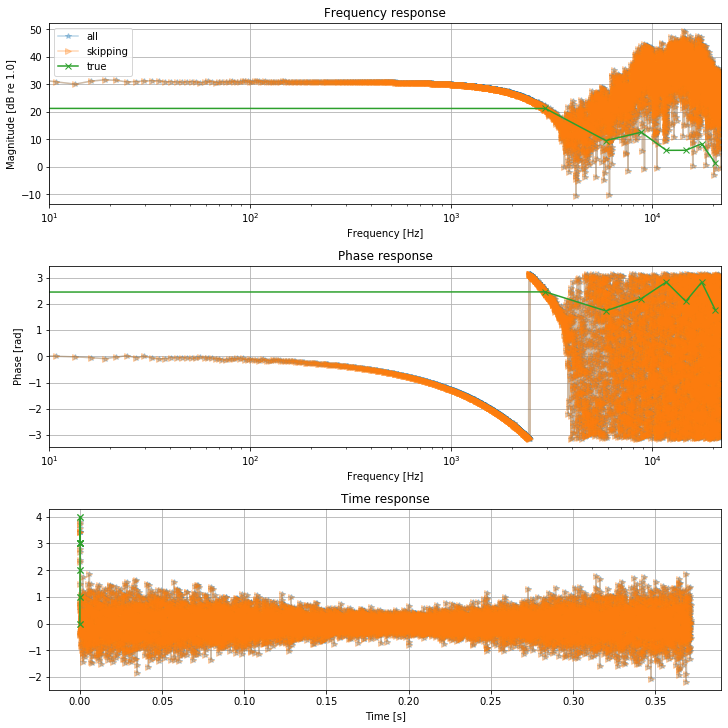

In [69]:
fig = Response.from_freq(sr, H1).plot(label="all", plot_kw=dict(alpha=0.3, marker="*"))
Response.from_freq(sr, H2).plot(use_fig=fig, label="skipping", plot_kw=dict(alpha=0.3, marker=">"))
Response.from_time(sr, h).plot(use_fig=fig, label="true", plot_kw=dict(alpha=1, marker="x"));

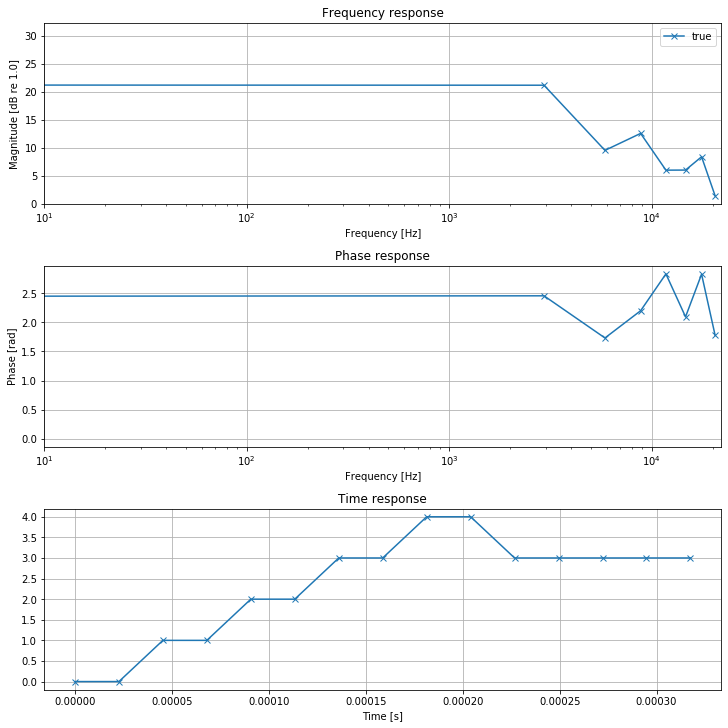

In [70]:
Response.from_time(sr, h).plot(label="true", plot_kw=dict(alpha=1, marker="x"));

(array([9.70681733e-06, 6.31121252e-06, 1.73008690e-06, ...,
        5.28884435e-09, 1.18309299e-07, 2.40417945e-07]),
 array([0.00000e+00, 1.00000e-01, 2.00000e-01, ..., 2.20498e+04,
        2.20499e+04, 2.20500e+04]),
 <matplotlib.lines.Line2D at 0x7f93c6a05748>)

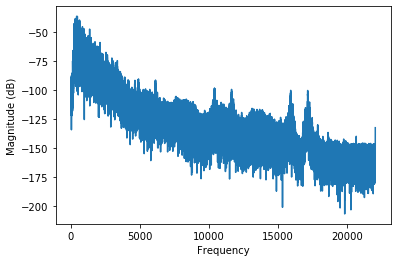

In [82]:
from matplotlib.pyplot import magnitude_spectrum
magnitude_spectrum(x, Fs=sr, scale="dB")

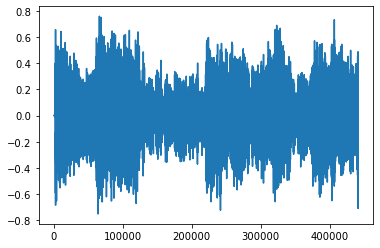

In [73]:
plt.plot(x)